In [33]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [34]:
create_experiment_snapshots([25, 50, 75, 100])

In [35]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True


Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 4
MTD: ServiceDiversity triggered 0.0s
Static period: 29.412303352021453
Action: 0
Static period: 29.412303352021453
Action: 1
MTD: ServiceDiversity triggered 100.0s
Static period: 29.878682915375094
Action: 2
MTD: ServiceDiversity triggered 200.7s
Static period: 29.842204789746972
Action: 0
Static period: 29.842204789746972
Action: 1
MTD: ServiceDiversity triggered 301.0s
Static period: 30.615600778600708
Action: 3
MTD: OSDiversity triggered 401.7s
Static period: 19.85251462737483
Action: 1
MTD: OSDiversity triggered 501.8s
Static period: 18.80505983615251
Action: 0
Static period: 18.80505983615251
Action: 2
MTD: OSDiversity triggered 601.8s
Static period: 19.933693939402588
Action: 2
MTD: OSDiversity triggered 702.2s
Static period: 18.721178028332815
Action: 0
Static period: 18.721178028332815
Action: 1
MTD: Co

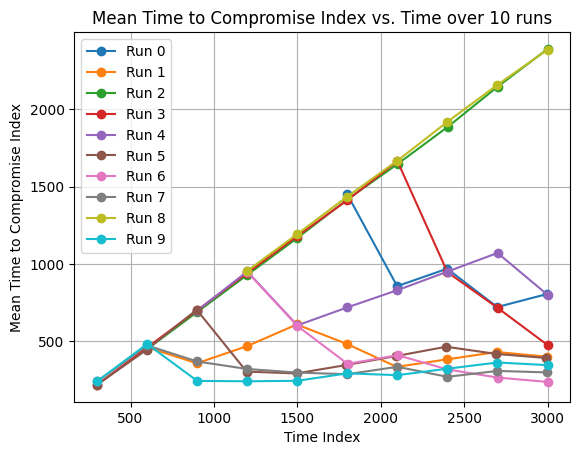

In [36]:
all_runs_list = []
runs = 10
# Run the simulation and collect data
for run_index in range(runs):  # Adjust the range for the number of runs
    features = ["host_compromise_ratio"]
    model = "main_network_final_host_compromise_ratio"
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp())
    all_runs_list.append(eva)


# Iterate over each run and plot the pairs
for run_index in range(runs):  
    plt.plot(all_runs_list[run_index]['Time'],  all_runs_list[run_index]['Mean Time to Compromise'] , marker='o', linestyle='-', label=f'Run {run_index}')
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise Index vs. Time over {runs} runs')
plt.grid(True)
plt.legend()
plt.show()

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 4
MTD: ServiceDiversity triggered 0.0s
Static period: 28.50697172869137
Action: 4
MTD: ServiceDiversity triggered 100.2s
Static period: 29.169696848962843
Action: 0
Static period: 29.169696848962843
Action: 3
MTD: ServiceDiversity triggered 200.3s
Static period: 29.466897783576997
Action: 0
Static period: 29.466897783576997
Action: 1
MTD: ServiceDiversity triggered 300.5s
Static period: 30.141052820222853
Action: 2
MTD: IPShuffle triggered 400.8s
Static period: 100.341895072395
Action: 4
MTD: IPShuffle triggered 501.2s
MTD: Interrupted EXPLOIT_VULN at 511.8s!
Static period: 89.65693762567275
Action: 4
MTD: IPShuffle triggered 601.5s
Static period: 100.63948273573192
Action: 2
MTD: IPShuffle triggered 702.1s
MTD: Interrupted EXPLOIT_VULN at 712.1s!
Static period: 90.35666305720588
Action: 3
MTD: IPShuffle triggere

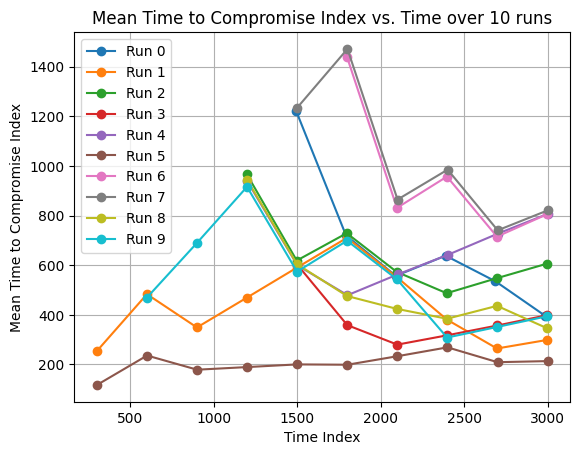

In [37]:
all_runs_list = []
runs = 10
# Run the simulation and collect data
for run_index in range(runs):  # Adjust the range for the number of runs
    features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
    model = "main_network_final_host_compromise_ratio#exposed_endpoints#attack_path_exposure#overall_asr_avg#roa#shortest_path_variability#risk"
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp())
    all_runs_list.append(eva)


# Iterate over each run and plot the pairs
for run_index in range(runs):  
    plt.plot(all_runs_list[run_index]['Time'], all_runs_list[run_index]['Mean Time to Compromise'] , marker='o', linestyle='-', label=f'Run {run_index}')
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise Index vs. Time over {runs} runs')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
all_runs_list

[   Mean Time to Compromise         Time
 0              1222.001949  1492.370851
 1               720.452828  1790.845022
 2               556.955067  2089.319192
 3               638.372007  2387.793362
 4               534.912951  2686.267532
 5               395.523945  2984.741703,
    Mean Time to Compromise         Time
 0               254.090797   299.466639
 1               483.109180   598.933279
 2               348.934036   898.399918
 3               469.370681  1197.866558
 4               590.309365  1497.333197
 5               710.283502  1796.799836
 6               551.461245  2096.266476
 7               380.421961  2395.733115
 8               264.120160  2695.199754
 9               298.479900  2994.666394,
    Mean Time to Compromise         Time
 0               966.836585  1196.918727
 1               618.649808  1496.148408
 2               728.976426  1795.378090
 3               572.999728  2094.607772
 4               487.023305  2393.837453
 5            